In [ ]:
inpath = 'ufo_awesome.tsv'
inf = open(inpath, 'r')

for i, line in enumerate(inf):
    splitline = line.split('\\t')
    if len(splitline) != 6:
        first_bad_line = splitline
        print("First bad row:", i)
        for j, col in enumerate(first_bad_line):
            print(j, col)
        break

inf.close()

In [22]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

In [24]:
col_names = ["date_occurred", "date_reported", "location", "short_desc", "duration", "description"]
ufo = pd.read_csv("ufo_awesome.tsv", sep="\t", names=col_names, na_values=["0000"], dtype=str)

In [25]:
ufo.head()

,date_occurred,date_reported,location,short_desc,duration,description
0,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
3,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
4,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [26]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61393 entries, 0 to 61392
Data columns (total 6 columns):
date_occurred    61139 non-null object
date_reported    61393 non-null object
location         61392 non-null object
short_desc       58870 non-null object
duration         58956 non-null object
description      61386 non-null object
dtypes: object(6)
memory usage: 3.3+ MB


In [35]:
ufo.index = pd.to_datetime(ufo.date_reported, "%Y%m%d")

In [36]:
ufo.head()

,date_occurred,date_reported,location,short_desc,duration,description
date_reported,,,,,,
1995-10-09,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1995-10-11,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
1995-01-03,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
1995-05-10,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
1995-06-14,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [ ]:
ufo.index.to_series().map(lambda d: d.weekday())

In [ ]:
pd.to_datetime(ufo['date_occurred'], format="%Y%m%d")

In [32]:
ufo.index = pd.to_datetime(ufo['date_reported'], format="%Y%m%d")

In [37]:
import re

In [38]:
location_regex = re.compile(r'\s*(.+), ([A-Z]{2})\s*$')

In [39]:
print(location_regex.match("Bill Gates"))

None


In [44]:
m = location_regex.match("Las Vegas, NV")

In [45]:
type(m)

_sre.SRE_Match

In [41]:
m.groups()

('Las Vegas', 'NV')

In [42]:
m = location_regex.match("Las Vegas, NVC")

In [43]:
type(m)

NoneType

In [46]:
m = location_regex.match("Las Vegas, NV USA")

In [47]:
type(m)

NoneType

In [48]:
def extract_city_state(loc):
    location_regex = re.compile(r"\s*(.+), ([A-Z]{2})\s*$")
    try:
        match = location_regex.match(loc)
    except TypeError:
        match = None
        
    if match:
        city, state = match.groups()
    else:
        city, state = (None, None)
        
    return city, state       

In [49]:
locations = ufo.location.map(extract_city_state)

In [50]:
type(locations)

pandas.core.series.Series

In [51]:
locations[:5]

date_reported
1995-10-09    (Iowa City, IA)
1995-10-11    (Milwaukee, WI)
1995-01-03      (Shelton, WA)
1995-05-10     (Columbia, MO)
1995-06-14      (Seattle, WA)
Name: location, dtype: object

In [52]:
ufo["state"] = [state for city, state in locations]
ufo.head()

,date_occurred,date_reported,location,short_desc,duration,description,state
date_reported,,,,,,,
1995-10-09,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by...",IA
1995-10-11,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri...",WI
1995-01-03,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...,WA
1995-05-10,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...,MO
1995-06-14,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...,WA


In [53]:
ufo["city"] = [city for city, state in locations]

In [54]:
ufo.head()

,date_occurred,date_reported,location,short_desc,duration,description,state,city
date_reported,,,,,,,,
1995-10-09,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by...",IA,Iowa City
1995-10-11,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri...",WI,Milwaukee
1995-01-03,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...,WA,Shelton
1995-05-10,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...,MO,Columbia
1995-06-14,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...,WA,Seattle


In [55]:
ufo.date_occurred.groupby(ufo.index).count()

date_reported
1905-06-23     2
1995-01-01     3
1995-01-02     1
1995-01-03     8
1995-01-04     3
1995-01-05     4
1995-01-06     1
1995-01-07     4
1995-01-08     1
1995-01-09     2
1995-01-10     1
1995-01-11     1
1995-01-12     2
1995-01-13     2
1995-01-14     1
1995-01-15     2
1995-01-16     1
1995-01-17     3
1995-01-18     3
1995-01-20     3
1995-01-21     1
1995-01-22     2
1995-01-23     4
1995-01-24     5
1995-01-25     2
1995-01-26     1
1995-01-27     2
1995-01-28     1
1995-01-29     1
1995-01-30     3
              ..
2010-08-01    21
2010-08-02    14
2010-08-03    17
2010-08-04    15
2010-08-05    18
2010-08-06    25
2010-08-07    21
2010-08-08    13
2010-08-09    20
2010-08-10    26
2010-08-11    15
2010-08-12    25
2010-08-13    20
2010-08-14    25
2010-08-15    20
2010-08-16    17
2010-08-17    19
2010-08-18     9
2010-08-19    14
2010-08-20    16
2010-08-21    22
2010-08-22    17
2010-08-23    16
2010-08-24    18
2010-08-25    15
2010-08-26    23
2010-08-27    24


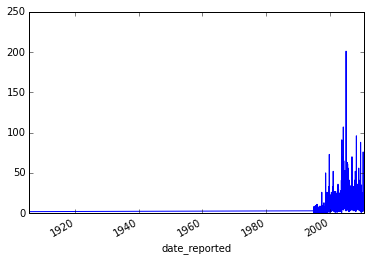

In [59]:
ufo.date_occurred.groupby(ufo.index).count().plot()

In [75]:
post1990 = ufo.drop(datetime.date(1905, 6, 23), axis=0)

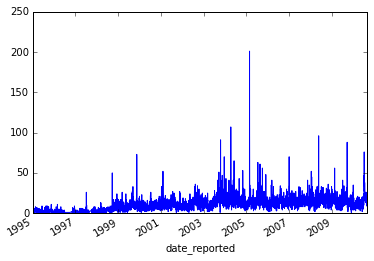

In [76]:
post1990.date_occurred.groupby(post1990.index).count().plot()

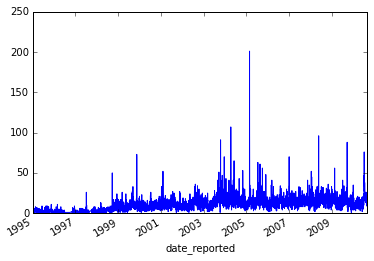

In [77]:
post1990.date_occurred.groupby(post1990.index).count().plot()

In [78]:
help(ufo.drop)

Help on method drop in module pandas.core.generic:

drop(labels, axis=0, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Return new object with labels in requested axis removed
    
    Parameters
    ----------
    labels : single label or list-like
    axis : int or axis name
    level : int or level name, default None
        For MultiIndex
    inplace : bool, default False
        If True, do operation inplace and return None.
    errors : {'ignore', 'raise'}, default 'raise'
        If 'ignore', suppress error and existing labels are dropped.
    
        .. versionadded:: 0.16.1
    
    Returns
    -------
    dropped : type of caller



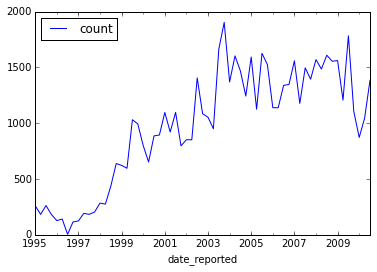

In [79]:
post1990.date_occurred.resample("Q", how=["count"]).plot()

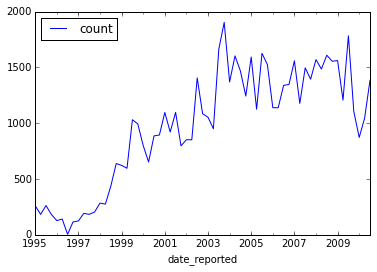

In [80]:
post1990.date_occurred.resample("Q", how=["count"]).plot()

In [81]:
dow = ["Su", "M", "Tu", "W", "Th", "F", "Sa"]
post1990.index.to_series().map(lambda d: d.weekday())

date_reported
1995-10-09    0
1995-10-11    2
1995-01-03    1
1995-05-10    2
1995-06-14    2
1995-10-24    1
1995-04-19    2
1995-09-11    0
1995-02-14    1
1995-09-15    4
1995-02-20    0
1995-07-24    0
1995-06-12    0
1995-08-23    2
1995-04-16    6
1995-02-07    1
1995-11-17    4
1995-06-11    6
1995-05-14    6
1995-02-04    5
1995-09-11    0
1995-11-06    0
1995-06-28    2
1995-03-14    1
1995-03-07    1
1995-05-16    1
1995-07-30    6
1995-08-22    1
1995-02-07    1
1995-09-10    6
             ..
2010-08-13    4
2010-08-21    5
2010-08-26    3
2010-08-10    1
2010-08-27    4
2010-08-07    5
2010-08-19    3
2010-08-12    3
2010-08-21    5
2010-08-10    1
2010-08-29    6
2010-08-19    3
2010-08-13    4
2010-08-27    4
2010-08-08    6
2010-08-12    3
2010-08-10    1
2010-08-14    5
2010-08-12    3
2010-08-17    1
2010-08-10    1
2010-08-26    3
2010-08-28    5
2010-08-27    4
2010-08-28    5
2010-08-20    4
2010-08-26    3
2010-08-27    4
2010-08-21    5
2010-08-24    1
Name: date

In [84]:
dow = ["Su", "M", "Tu", "W", "Th", "F", "Sa"]
post1990["foo"] = post1990.index.to_series().map(lambda d: d.weekday())

/Users/jeff/python/2015-06/class-notes/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


Apparently the error is just a warning and it created it anyway.  My belief is it was already set.

In [83]:
help(ufo.plot)

Help on method plot_frame in module pandas.tools.plotting:

plot_frame(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds) method of pandas.core.frame.DataFrame instance
    Make plots of DataFrame using matplotlib / pylab.
    
    Parameters
    ----------
    data : DataFrame
    x : label or position, default None
    y : label or position, default None
        Allows plotting of one column versus another
    kind : str
        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same

In [85]:
post1990.day_of_week.value_counts().sort_index()

0    9502
1    8996
2    8629
3    8754
4    8029
5    8486
6    8995
dtype: int64

In [88]:
data = post1990.day_of_week.value_counts().sort_index()

In [90]:
data.index = dow

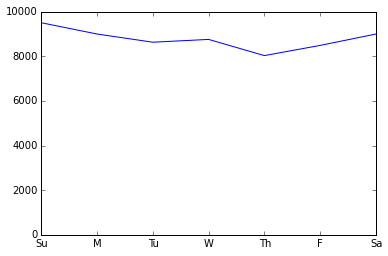

In [91]:
data.plot(ylim=(0, 10000))

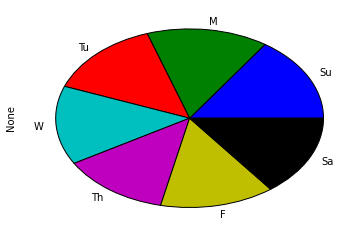

In [92]:
data.plot(kind="pie")

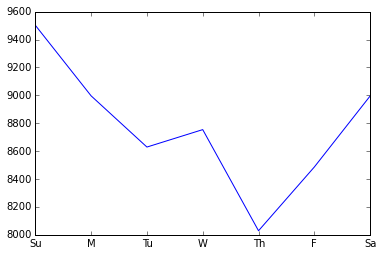

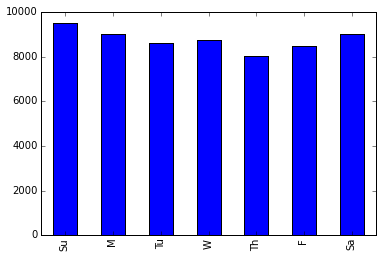

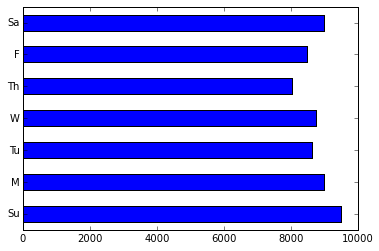

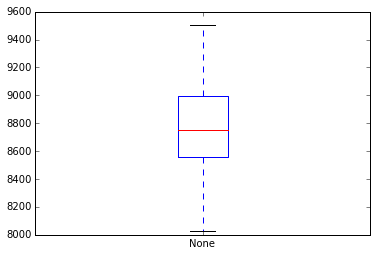

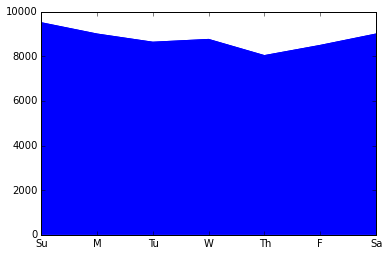

In [93]:
for kind in ['line', 'bar', 'barh', 'box', 'area']:
    data.plot(kind=kind)
    plt.show()

In [94]:
post1990.head()

,date_occurred,date_reported,location,short_desc,duration,description,state,city,day_of_week,foo
date_reported,,,,,,,,,,
1995-10-09,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by...",IA,Iowa City,0,0
1995-10-11,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri...",WI,Milwaukee,2,2
1995-01-03,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...,WA,Shelton,1,1
1995-05-10,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...,MO,Columbia,2,2
1995-06-14,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...,WA,Seattle,2,2


In [95]:
type(post1990['location'])

pandas.core.series.Series

In [96]:
type(post1990.index)

pandas.tseries.index.DatetimeIndex